In [1]:
#Importing required libraries
import torch
import torchvision
from torchvision import transforms, datasets
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#Importing MNIST dataset
train_data = datasets.MNIST("", train=True, download=True, 
                            transform = transforms.ToTensor())

test_data = datasets.MNIST("", train=False, download=True, 
                            transform = transforms.ToTensor())

In [4]:
#Initializing the variables
input_size = 784
hidden_layer_1 = 128
hidden_layer_2 = 64
num_classes = 10
num_epochs = 15
learning_rate = 0.001
batch_size=64

In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)


In [6]:
#Printing a sample tensor
for data in train_loader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
#Printing shape of a image
print(data[0][0].shape)

torch.Size([1, 28, 28])


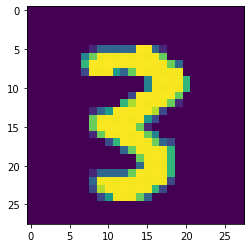

In [8]:
#Printing an image
plt.imshow(data[0][0].view(28,28))
plt.show()

In [9]:
#Counting the numbers of instances of each categort
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total=0
for data in train_loader:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1
print(counter_dict) 

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
#Printing the ratio of each category 
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


#### As we can see, the percentage of each categogy is nearly same, hence the data is balanced

In [11]:
#Creating a neural network with 2 hidden layers
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layer_1, hidden_layer_2, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_layer_1)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_layer_2, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out
model = NeuralNet(input_size, hidden_layer_1, hidden_layer_2, num_classes).to(device)
print(model)


NeuralNet(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=128, out_features=64, bias=True)
  (l3): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
#Loss and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
        

Epoch [1/15], Step [100/938], Loss: 0.5029
Epoch [1/15], Step [200/938], Loss: 0.1317
Epoch [1/15], Step [300/938], Loss: 0.3302
Epoch [1/15], Step [400/938], Loss: 0.1808
Epoch [1/15], Step [500/938], Loss: 0.3671
Epoch [1/15], Step [600/938], Loss: 0.1221
Epoch [1/15], Step [700/938], Loss: 0.2033
Epoch [1/15], Step [800/938], Loss: 0.1224
Epoch [1/15], Step [900/938], Loss: 0.2979
Epoch [2/15], Step [100/938], Loss: 0.2100
Epoch [2/15], Step [200/938], Loss: 0.1808
Epoch [2/15], Step [300/938], Loss: 0.3771
Epoch [2/15], Step [400/938], Loss: 0.1722
Epoch [2/15], Step [500/938], Loss: 0.0535
Epoch [2/15], Step [600/938], Loss: 0.0495
Epoch [2/15], Step [700/938], Loss: 0.0686
Epoch [2/15], Step [800/938], Loss: 0.1256
Epoch [2/15], Step [900/938], Loss: 0.0647
Epoch [3/15], Step [100/938], Loss: 0.0937
Epoch [3/15], Step [200/938], Loss: 0.1488
Epoch [3/15], Step [300/938], Loss: 0.0925
Epoch [3/15], Step [400/938], Loss: 0.2019
Epoch [3/15], Step [500/938], Loss: 0.1175
Epoch [3/15

In [14]:
# Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.92 %


In [15]:
#Saving the model
torch.save(model.state_dict(), "./model")